In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/aiffel/data/trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100


missing_data_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

missing_data_info

,Missing Values,Percentage
passenger_name,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000
payment_method,0,0.000000
passenger_count,0,0.000000
trip_distance,0,0.000000
fare_amount,3,0.013215
tip_amount,0,0.000000
tolls_amount,0,0.000000


In [5]:
data = data.dropna()

In [6]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


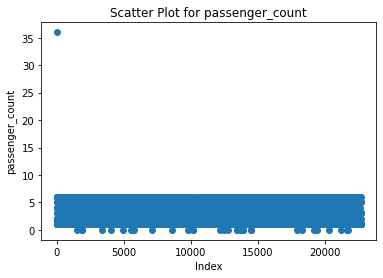

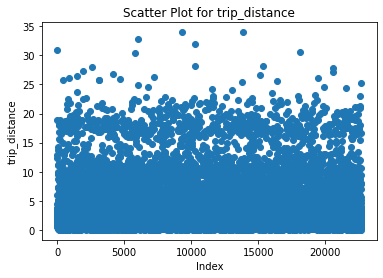

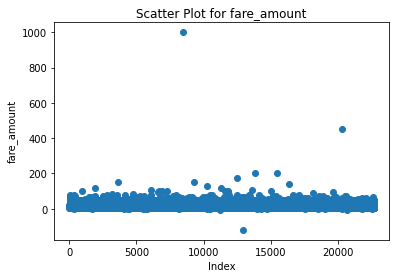

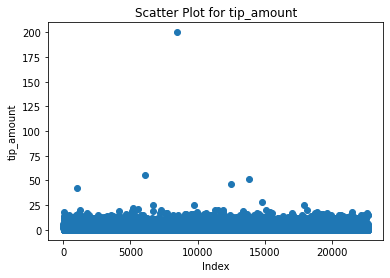

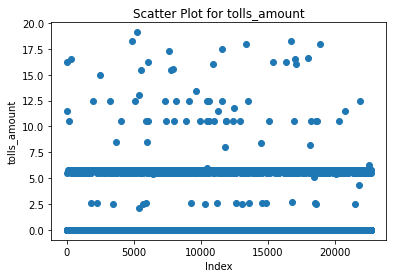

In [7]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure()
    plt.scatter(data.index, data[col])
    plt.title(f'Scatter Plot for {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

In [8]:
def remove_extreme_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)], lower_bound, upper_bound


extreme_outliers_info = {}


for col in numeric_columns:
    original_count = len(data)
    data, lower_bound, upper_bound = remove_extreme_outliers(data, col)
    removed_count = original_count - len(data)
    extreme_outliers_info[col] = {
        "Extreme Outliers Removed": removed_count,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    }

In [9]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60


correlation_data = data[['trip_duration', 'trip_distance', 'fare_amount']].corr()

In [10]:
correlation_data

,trip_duration,trip_distance,fare_amount
trip_duration,1.000000,0.108148,0.143719
trip_distance,0.108148,1.000000,0.919542
fare_amount,0.143719,0.919542,1.000000


In [11]:
data['payment_method'] = data['payment_method'].replace(['Credit Card', 'Debit Card'], 'Card')


data['payment_method'].unique()


array(['Card', 'Cash'], dtype=object)